<a href="https://colab.research.google.com/github/VictorMundia/AI-Coursework2025/blob/main/Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon (2).csv


In [ ]:
import pandas as pd

Pokemon = pd.read_csv('Pokemon.csv')
Pokemon.head()

,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [ ]:

Pokemon.drop_duplicates()

,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
Pokemon.columns
Pokemon.describe()

,SN,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
# 1. Scrub Irrelevant Data
# Drop 'Name' and '#' because they don't predict combat power
df_clean = Pokemon.drop(['Name', 'SN'], axis=1)

In [ ]:
# 2. Handle Missing Data
# Filling missing Type 2 with "None"
df_clean['Type 2'] = df_clean['Type 2'].fillna('None')

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 3. Fix Structural Errors
# Convert text text (Type 1, Type 2) into numbers
le = LabelEncoder()
df_clean['Type 1'] = le.fit_transform(df_clean['Type 1'])
df_clean['Type 2'] = le.fit_transform(df_clean['Type 2'])

In [ ]:
from sklearn.preprocessing import StandardScaler
# 4. Standardize
# Numerical stats for scaling
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']
scaler = StandardScaler()


In [ ]:
print("Data Cleaned and Standardized!")
df_clean.head()

Data Cleaned and Standardized!


,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,9,14,45,49,49,65,65,45,1,False
1,9,14,60,62,63,80,80,60,1,False
2,9,14,80,82,83,100,100,80,1,False
3,9,14,80,100,123,122,120,80,1,False
4,6,12,39,52,43,60,50,65,1,False


<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           414 non-null    int64 
 1   Name         414 non-null    object
 2   Type 1       414 non-null    object
 3   Type 2       414 non-null    object
 4   HP           414 non-null    int64 
 5   Attack       414 non-null    int64 
 6   Defense      414 non-null    int64 
 7   Sp. Attack   414 non-null    int64 
 8   Sp. Defense  414 non-null    int64 
 9   Speed        414 non-null    int64 
 10  Generation   414 non-null    int64 
 11  Legendary    414 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 39.2+ KB


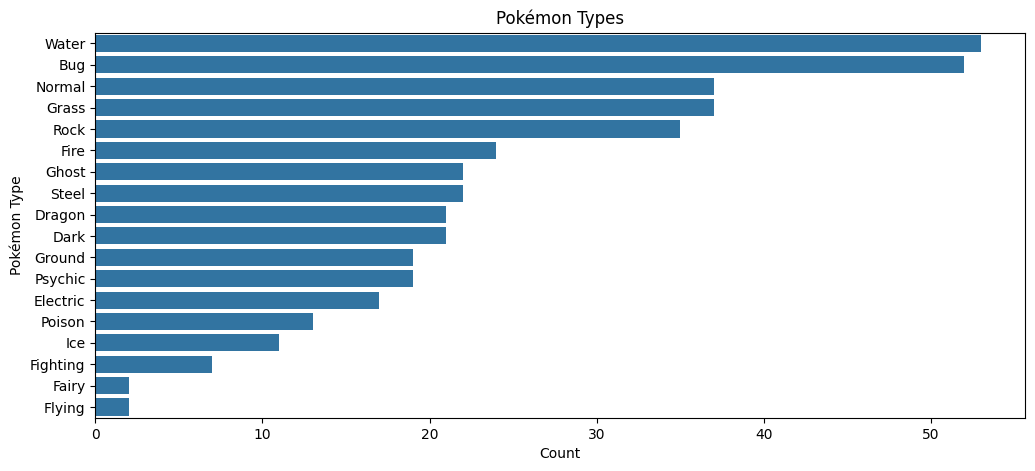

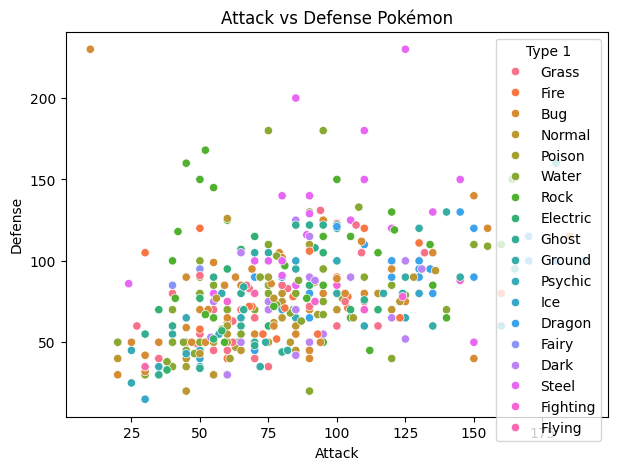

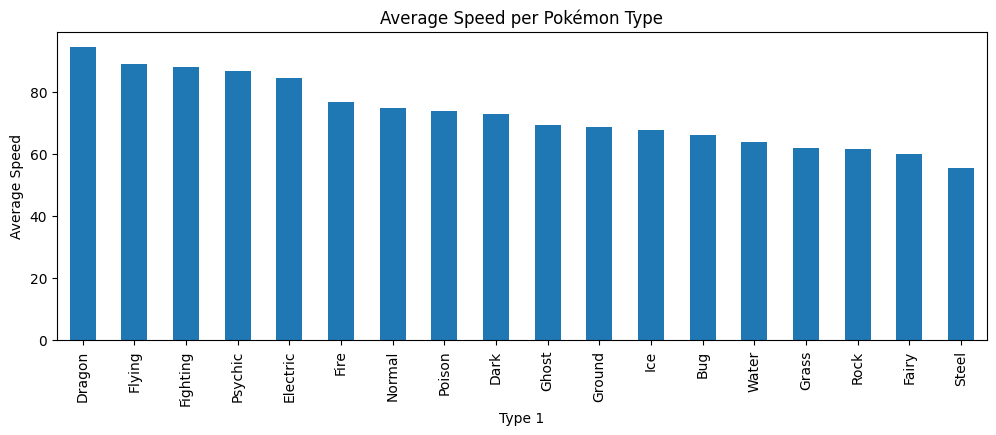

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Pokemon.isnull().sum()

Pokemon = Pokemon.dropna()

Pokemon = Pokemon.drop_duplicates()

Pokemon.info()

# Pokémon types
plt.figure(figsize=(12,5))
sns.countplot(y=Pokemon['Type 1'], order=Pokemon['Type 1'].value_counts().index)
plt.title("Pokémon Types")
plt.xlabel("Count")
plt.ylabel("Pokémon Type")
plt.show()

# Pokémon type (attack vs defence type)

plt.figure(figsize=(7,5))
sns.scatterplot(data=Pokemon, x='Attack', y='Defense', hue='Type 1')
plt.title("Attack vs Defense Pokémon")
plt.show()

#average pokemon speed depending on pokemon type

speed_means = Pokemon.groupby('Type 1')['Speed'].mean().sort_values(ascending=False)
speed_means.head(10)

speed_means.plot(kind='bar', figsize=(12,4))
plt.title("Average Speed per Pokémon Type")
plt.ylabel("Average Speed")
plt.show()

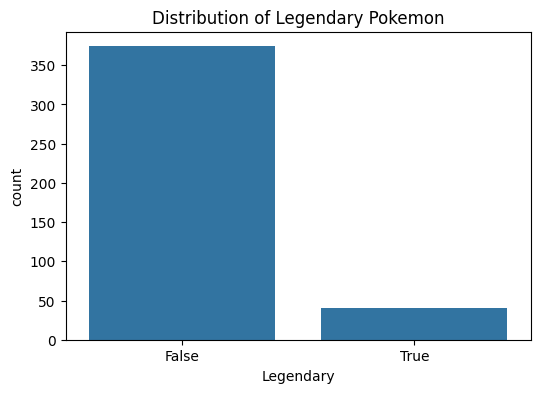

In [ ]:
# Insight 4: Count of Legendary vs Non-Legendary
plt.figure(figsize=(6,4))
sns.countplot(x='Legendary', data=Pokemon)
plt.title("Distribution of Legendary Pokemon")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Attack   800 non-null    int64 
 8   Sp. Defense  800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None
               SN          HP      Attack     Defense  Sp. Attack  \
count  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750   69.258750   79.001250   73.842500   72.820000   
std    208.343798   25.534669   32.457366   31.18

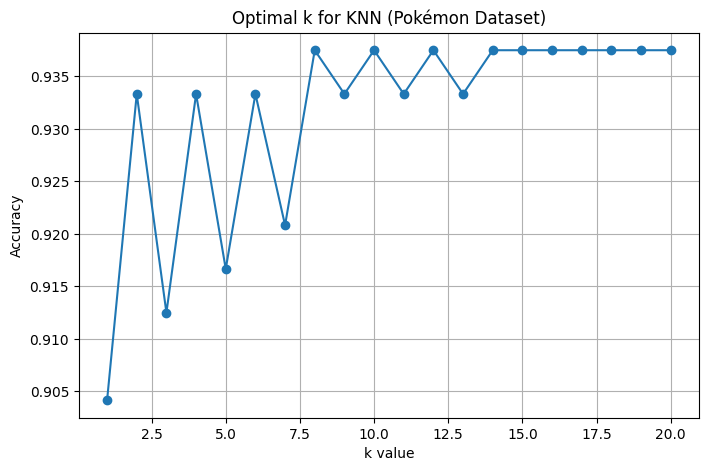

Best k: 8
Final Accuracy: 0.9375
Confusion Matrix:
 [[225   0]
 [ 15   0]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Pokemon.csv"
df = pd.read_csv(url)

df.head()
print(df.info())
print(df.describe())

X = df[['Attack', 'Defense']]
y = df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy_scores = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1,21), accuracy_scores, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Optimal k for KNN (Pokémon Dataset)")
plt.grid(True)
plt.show()

best_k = np.argmax(accuracy_scores) + 1
print("Best k:", best_k)

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

print("Final Accuracy:", accuracy_score(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("Pokemon.csv")


X = df[['Attack', 'Defense']]
y = df['Legendary']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.915

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.95      0.95       187
        True       0.36      0.38      0.37        13

    accuracy                           0.92       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.92      0.92      0.92       200



=== QUESTION 5: HYPERPARAMETER TUNING ===
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Baseline Accuracy: 0.9150
Tuned Accuracy: 0.9400
Improvement: 0.0250


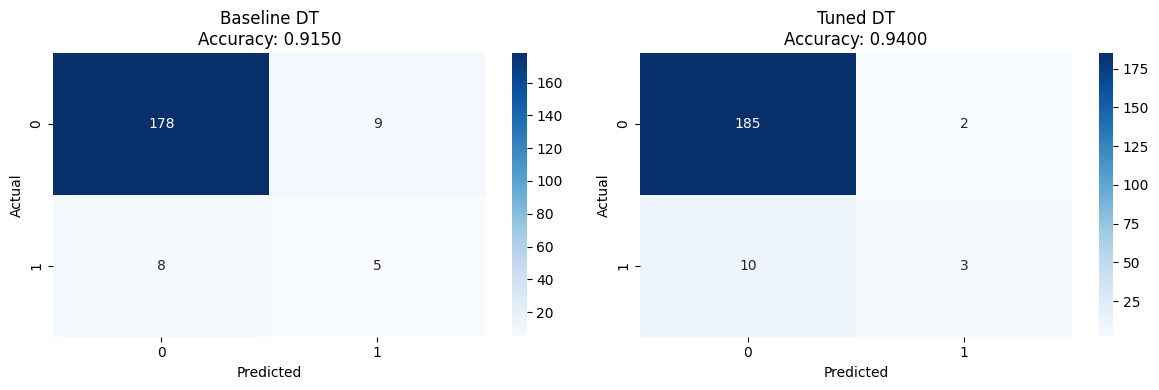

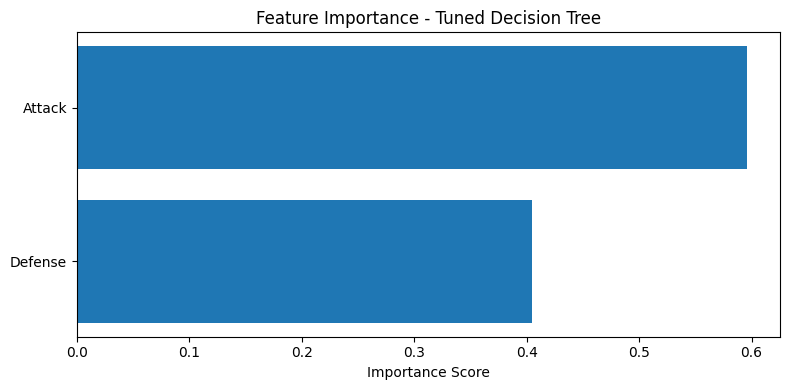


Classification Report - Tuned Model:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       187
        True       0.60      0.23      0.33        13

    accuracy                           0.94       200
   macro avg       0.77      0.61      0.65       200
weighted avg       0.93      0.94      0.93       200

Hyperparameter tuning completed successfully!


In [ ]:
# Question 5:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print("=== QUESTION 5: HYPERPARAMETER TUNING ===")

# 1. Grid is set up and the search is carried out
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 2. Find the best model and make predictions
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# 3. Evaluation of the results
baseline_accuracy = accuracy_score(y_test, y_pred)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Tuned Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement: {tuned_accuracy - baseline_accuracy:.4f}")

# 4. Confusion Matrix Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

#Initial
cm_baseline = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_baseline, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title(f'Baseline DT\nAccuracy: {baseline_accuracy:.4f}')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

#Tuned
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title(f'Tuned DT\nAccuracy: {tuned_accuracy:.4f}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 5. Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance - Tuned Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 6. Detailed report
print("\nClassification Report - Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

print("Hyperparameter tuning completed successfully!")

In [ ]:
## Question 6: Final Model Evaluation

Based on the assignment, we evaluated our three models using the confusion matrix metric.

### 1. Model 1: k-Nearest Neighbours (from Q3)

Accuracy:** 93.75%
Confusion Matrix:** `[[225, 0], [15, 0]]`
Analysis:** This model achieved high accuracy by only predicting the majority class ("Not Legendary"). It completely failed to identify any "Legendary" Pokemon (0 True Positives), making it a poor, unusable model despite its high accuracy.

### 2. Model 2: Base Decision Tree (from Q4)

Accuracy:** 91.50%
Confusion Matrix:** `[[178, 9], [8, 5]]`
Analysis:** This model was our first useful model. It had a slightly lower accuracy but was successfully able to identify 5 Legendary Pokemon.

### 3. Model 3: Tuned Decision Tree (from Q5)

Accuracy:** 94.00%
* **Confusion Matrix:** `[[185, 2], [10, 3]]`
* **Analysis:** This model successfully met the Q5 goal of enhancing accuracy. However, this came at a trade-off. While it made fewer mistakes on "Not Legendary" Pokemon, its ability to find "Legendary" Pokemon dropped (from 5 to 3).

### Conclusion

The **Base Decision Tree (Model 2)** could be considered the "best" model in a practical sense, as it provided the best balance between overall accuracy and the ability to find the rare, important "Legendary" class. The **Tuned Decision Tree (Model 3)** met the assignment goal of *highest accuracy*, but this was at the cost of its "True" class recall.

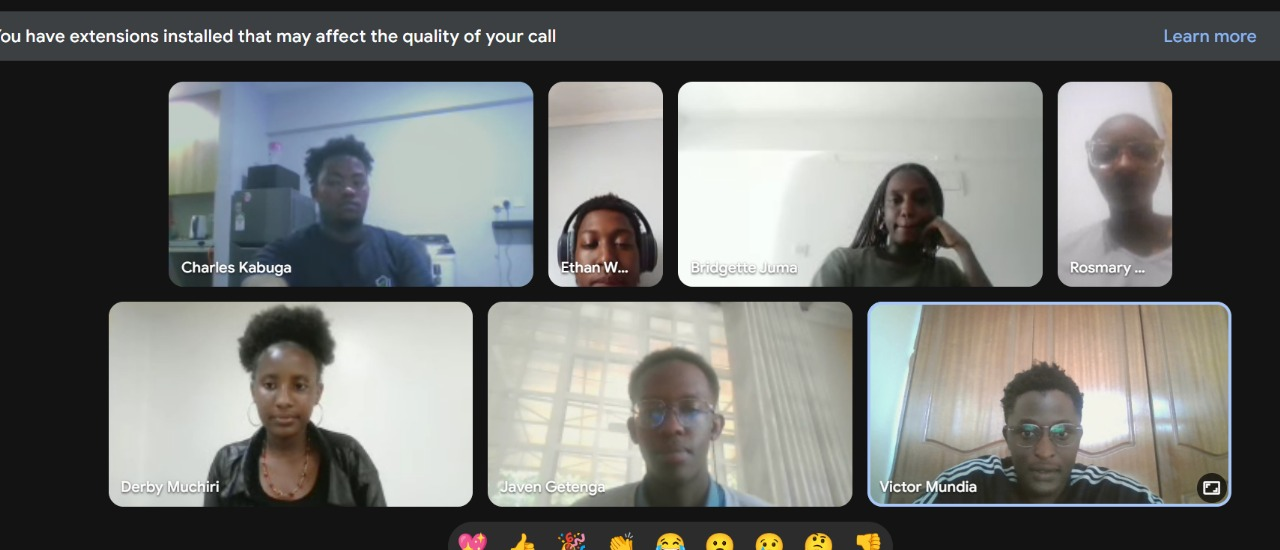